In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
import re
from wordcloud import WordCloud


In [2]:
data = pd.read_csv("/kaggle/input/brain-diseases-types/brain.csv", usecols=[2,3], on_bad_lines='skip', encoding='ISO-8859-1')
print(data.head())

                   Category                                        Description
A  Metabolic/Leukodystrophy  Rare X-linked disorder causing breakdown of my...
A            Leukodystrophy  Rare progressive white matter disease with cog...
A         Neurodegenerative  Group of progressive motor neuron diseases inc...
A         Neurodegenerative  Most common cause of dementia; progressive mem...
A         Neurodegenerative  Progressive degeneration of motor neurons lead...


In [3]:
print(f"Data Contain {data.shape[0]} Rows & {data.shape[1]} Columns")

Data Contain 64 Rows & 2 Columns


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64 entries, A to T
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Category     64 non-null     object
 1   Description  64 non-null     object
dtypes: object(2)
memory usage: 1.5+ KB


In [5]:
data.isnull().sum()

Category       0
Description    0
dtype: int64

In [6]:
data.describe()

,Category,Description
count,64,64
unique,41,64
top,Neurodegenerative,Rare X-linked disorder causing breakdown of my...
freq,8,1


In [7]:
data.Category.value_counts().to_frame()

,count
Category,
Neurodegenerative,8
Vascular,5
Movement Disorder,3
Structural,3
Infectious,3
Chronic Pain,2
Neurodevelopmental,2
Neurogenetic,2
Neurological,2


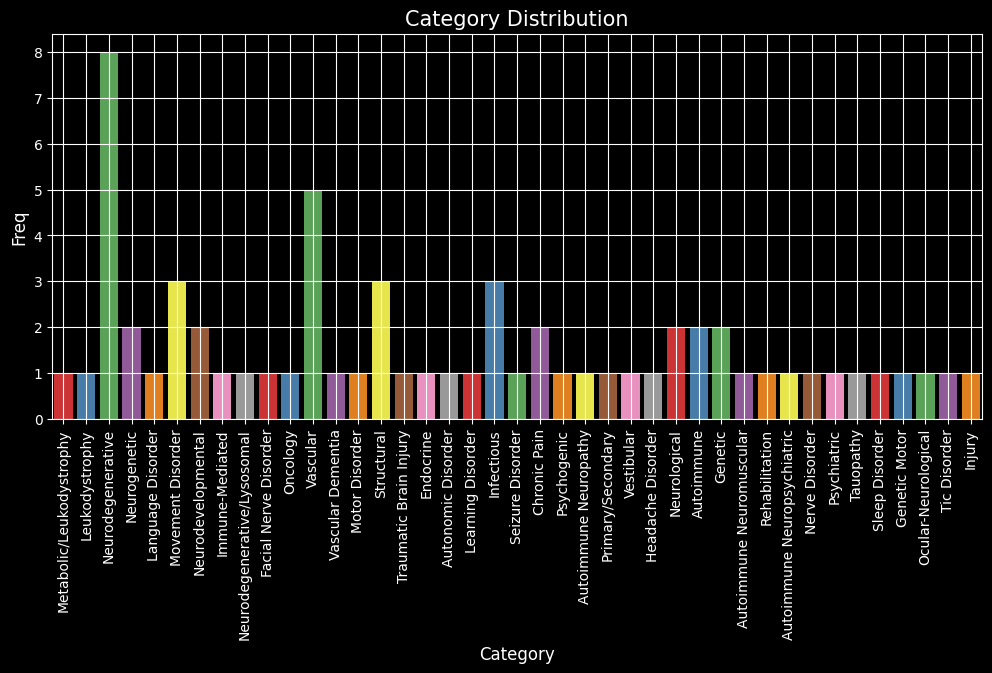

In [8]:
plt.style.use("dark_background")
plt.figure(figsize=(12,5))
sns.countplot(x="Category",data=data,palette="Set1")
plt.title("Category Distribution",fontsize=15)
plt.xlabel("Category",fontsize=12)
plt.ylabel("Freq",fontsize=12)
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

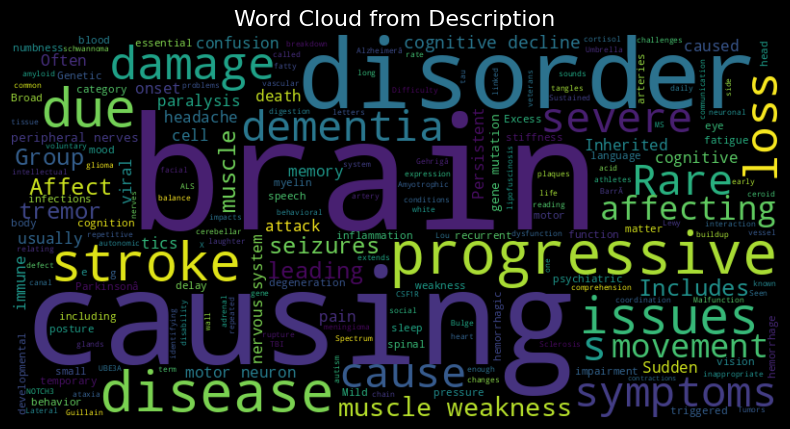

In [9]:
text = " ".join(str(i) for i in data["Description"])
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='black',
    max_words=200,
    colormap='viridis' 
).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud from Description", fontsize=16)
plt.show()

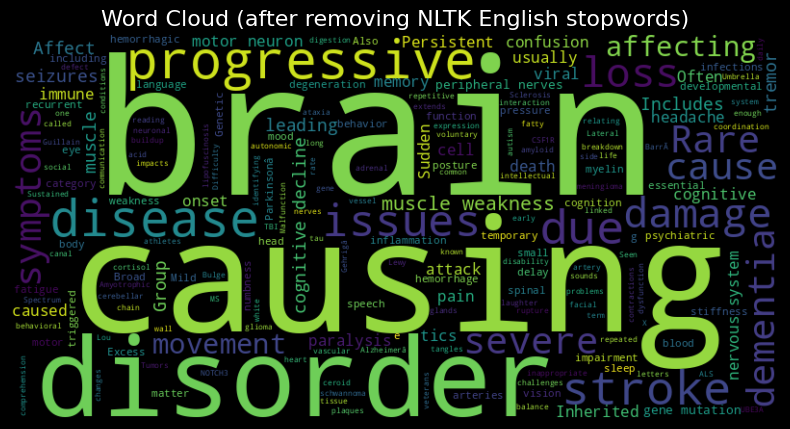

In [10]:
stop_words = set(stopwords.words('english'))
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='black',
    max_words=200,
    colormap='viridis',
    stopwords=stop_words 
).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud (after removing NLTK English stopwords)", fontsize=16)
plt.show()